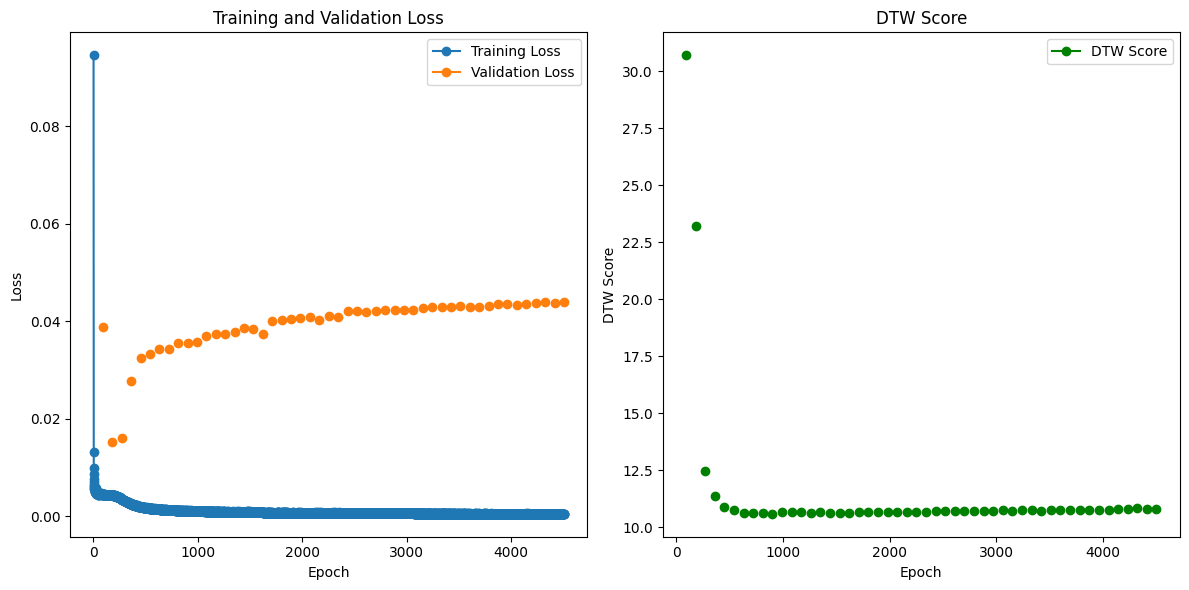

In [1]:
import re
import matplotlib.pyplot as plt

def extract_losses_and_dtw_scores(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    losses_and_dtw = {}

    current_epoch = None
    for line in lines:
        # Extract epoch number
        epoch_match = re.search(r'EPOCH (\d+)', line)
        if epoch_match:
            current_epoch = int(epoch_match.group(1))
            losses_and_dtw[current_epoch] = {}

        # Extract training loss
        training_loss_match = re.search(r'total training loss (\d+\.\d+)', line)
        if training_loss_match:
            training_loss = float(training_loss_match.group(1))
            losses_and_dtw[current_epoch]['training_loss'] = training_loss

        # Extract validation loss
        validation_loss_match = re.search(r'Validation result at .* loss: +(\d+\.\d+)', line)
        if validation_loss_match:
            validation_loss = float(validation_loss_match.group(1))
            losses_and_dtw[current_epoch]['validation_loss'] = validation_loss

        # Extract DTW Score
        dtw_score_match = re.search(r'Validation result at .* Val DTW Score: +(\d+\.\d+)', line)
        if dtw_score_match:
            dtw_score = float(dtw_score_match.group(1))
            losses_and_dtw[current_epoch]['dtw_score'] = dtw_score

    return losses_and_dtw

def plot_losses(losses_and_dtw):
    epochs = list(losses_and_dtw.keys())
    training_losses = [data.get('training_loss', None) for data in losses_and_dtw.values()]
    validation_losses = [data.get('validation_loss', None) for data in losses_and_dtw.values()]
    dtw_scores = [data.get('dtw_score', None) for data in losses_and_dtw.values()]

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, training_losses, label='Training Loss', marker='o')
    plt.plot(epochs, validation_losses, label='Validation Loss', marker='o')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, dtw_scores, label='DTW Score', marker='o', color='green')
    plt.xlabel('Epoch')
    plt.ylabel('DTW Score')
    plt.title('DTW Score')
    plt.legend()

    plt.tight_layout()
    plt.show()

file_path = "/Users/iamkittitat/Desktop/Junior2/indivECN/ProgressiveTransformersSLP/Configs/train.log"  # Update with your file path
losses_and_dtw = extract_losses_and_dtw_scores(file_path)
plot_losses(losses_and_dtw)
